<a href="https://colab.research.google.com/github/bagcakaya/Deep_Learning_Assignment2/blob/main/Copy_of_Assignment_2_(CNN_Image_Classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




## The Challenge

**Your task is to build an image classifier with Keras and Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    
 

In [ ]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


## Visualizing the Data


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [ ]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [ ]:
x_train[0].shape

(28, 28)

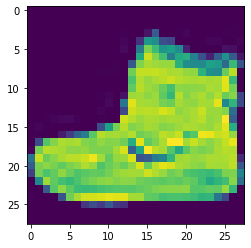

In [ ]:
plt.imshow(x_train[0])

In [ ]:
y_train[0]

9

In [ ]:
classes[9]

'Ankle boot'

## Preprocessing the Data


In [ ]:
x_train.max()

255

In [ ]:
x_train = x_train/255

In [ ]:
x_test = x_test/255

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)

In [ ]:
x_test = x_test.reshape(10000,28,28,1)

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
y_cat_train = to_categorical(y_train)

In [ ]:
y_cat_test = to_categorical(y_test)

## Building the Model


* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (3,3) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

### Training the Model


In [ ]:
model = Sequential()
model.add(Conv2D(filters=28, kernel_size=(3,3),input_shape=(28, 28, 1), activation='relu',))
model.add(MaxPool2D(pool_size=(2, 2),strides=(1, 1)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor = "val_accuracy", patience = 3)

In [ ]:
model.fit(x_train, y = y_cat_train, validation_data=(x_test,y_cat_test), batch_size = 32, epochs = 10, verbose = 1,
          callbacks = [early_stop])

Epoch 1/10
1875/1875 [==============================] - 176s 93ms/step - loss: 0.4100 - accuracy: 0.8581 - val_loss: 0.3218 - val_accuracy: 0.8854
Epoch 2/10
1482/1875 [======================>.......] - ETA: 30s - loss: 0.3018 - accuracy: 0.8956

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

NameError: ignored

In [ ]:
loss_df.plot();

### Evaluating the Model


In [ ]:
model.metrics_names

In [ ]:
model.evaluate(x_test,y_cat_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
predictions = model.predict(x_test)
predictions

In [ ]:
preds=np.argmax(predictions,axis=1)
preds

In [ ]:
y_cat_test.shape

In [ ]:
y_cat_test[0]

In [ ]:
np.argmax(predictions[0])

In [ ]:
y_test

In [ ]:
print(classification_report(y_test,preds))

In [ ]:
classes[6]

## Prediction

In [ ]:
samples=[x_test[19],x_test[15],x_test[12],x_test[14]]

In [ ]:
plt.imshow(samples[0])

In [ ]:
samples[0]

In [ ]:
img=samples[0]
img.shape

In [ ]:
type(img)

In [ ]:
resized_img=np.expand_dims(img, axis=0)
resized_img.shape

In [ ]:
model.predict(resized_img)

In [ ]:
np.argmax(model.predict(resized_img))

In [ ]:
classes[0]

In [ ]:

for img in samples:
    resized_img=np.expand_dims(img, axis=0)
    print(pd.Series(model.predict(resized_img).flatten(), index = classes).round(3))
    print(f"predicted class is : {classes[np.argmax(model.predict(resized_img))]}\n")
    